<a href="https://colab.research.google.com/github/Manarsenic/stock-price-predictor/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhanced Stock Price Predictor

This interactive Google Colab notebook provides a comprehensive and in-depth analysis of stock market data. It goes beyond a simple script to demonstrate advanced data analysis, feature engineering, and a Long Short-Term Memory (LSTM) deep learning model for prediction.

### Key Features:
- **Interactive Widgets**: Easily select a stock ticker and date range without modifying the code.
- **Advanced Data Analysis**: Visualize key metrics like historical price trends and moving averages.
- **Deep Learning Model**: Build and train a sophisticated LSTM model, a type of neural network well-suited for time-series data.
- **Model Evaluation**: Assess the model's performance using standard metrics like Root Mean Squared Error (RMSE).

### Author: Manas Kumar

In [40]:
# Install necessary libraries if they aren't already present in the Colab environment
!pip install yfinance scikit-learn pandas matplotlib tensorflow ipywidgets

Import all the libraries you'll need for the entire project.

In [41]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

#libraries for machine learning and dl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#for interactive elements and display

from ipywidgets import interact,widgets
from IPython.display import display



print("all required librarues have been successfully inported")

all required librarues have been successfully inported


## Step 1: Data Acquisition with Interactive Widgets

We'll use an interactive widget to fetch historical stock data. This makes the notebook more user-friendly and allows for quick analysis of different stocks and time periods without changing the code directly.

In [45]:
# a global variable stockdata will fetch the stored data so it can be used for other cells
stockdata=pd.DataFrame()
def fetchdata(ticker,startdate,enddate):
  global stockdata
  try:
    data=yf.download(ticker,start=startdate,end=enddate)
    if data.empty:
      print("error not data fetched")
    else:
      stockdata=data
      print("successfully fetched ", len(stockdata),'datapoints ',ticker)
      display(stockdata.head())
  except Exception as e1:
    print("error occurred",e1)

#creating interacrivve widget
tickerwidget=widgets.Text(value='GOOG',description='Ticker:')
startdatewidget=widgets.DatePicker(value=pd.to_datetime('2018-01-01'),description='Start Date:')
enddatewidget=widgets.DatePicker(value=pd.to_datetime('2025-01-01'),description='End Date:')
interactivewidget=interact(fetchdata,ticker=tickerwidget,startdate=startdatewidget,enddate=enddatewidget)

interactive(children=(Text(value='GOOG', description='Ticker:'), DatePicker(value=Timestamp('2018-01-01 00:00:…

## Step 2: Data Visualization and Feature Engineering

Before building our model, it's crucial to understand the data. We'll visualize the historical closing price and also create and plot Simple Moving Averages (SMAs), which are common indicators used to smooth out price data and identify trends.

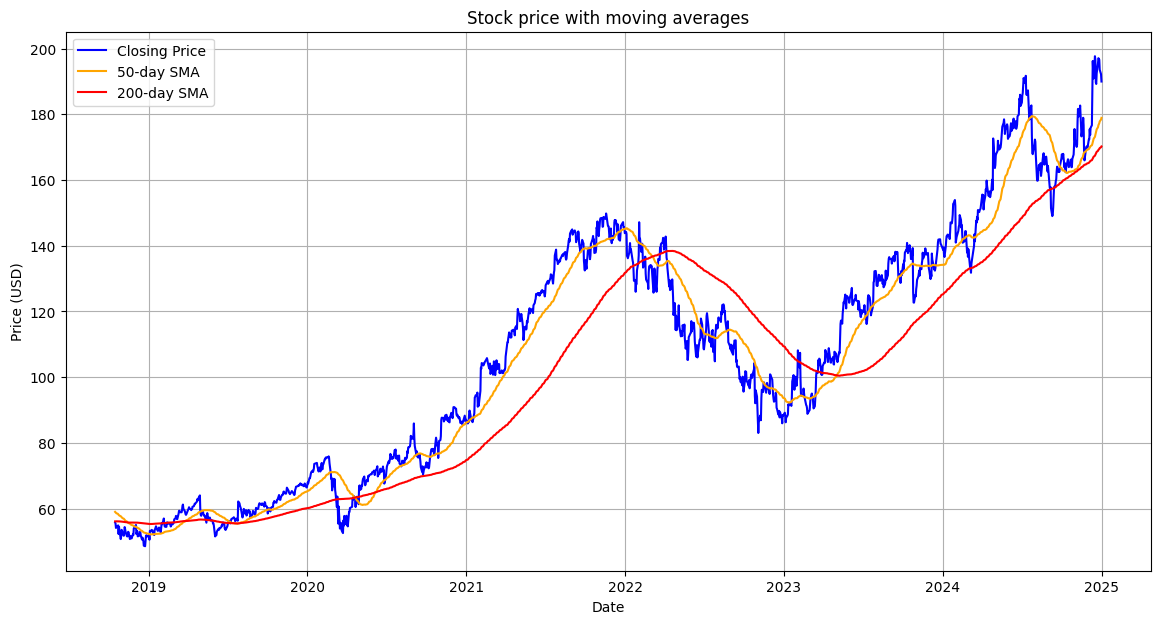

In [46]:
if not stockdata.empty:
  #feature engineering is to create simple moving averages
  stockdata['SMA_50']=stockdata['Close'].rolling(window=50).mean()
  stockdata['SMA_200']=stockdata['Close'].rolling(window=200).mean()

  #dropping rows with the nan values from rolling mean calculation
  stockdata.dropna(inplace=True)
  #plotting the data
  plt.figure(figsize=(14,7))
  plt.plot(stockdata['Close'],label='Closing Price',color='blue')
  plt.plot(stockdata['SMA_50'],label='50-day SMA',color='orange')
  plt.plot(stockdata['SMA_200'],label='200-day SMA',color='red')
  plt.title('Stock price with moving averages')
  plt.xlabel('Date')
  plt.ylabel('Price (USD)')
  plt.legend()
  plt.grid(True)
  plt.show()
else:
  print("no data available to visualize")

## Step 3: Building and Training a Ridge Regression Model

This is the core of our predictive analysis. We will use a Ridge Regression model, a type of linear model with regularization. This model is well-suited for time-series data as it helps prevent overfitting by penalizing large coefficients.

Our process will involve:
1.  **Feature Engineering**: Creating a dataset where previous days' prices are used to predict a future day's price.
2.  **Data Splitting**: Separating our data into a training set and a testing set.
3.  **Building the Model**: Constructing and training the Ridge Regression model.

In [47]:
if not stockdata.empty:
    # Create the dataset for the model
    df = stockdata[['Close']].copy()

    # Create a lagged dataset. We'll use the previous 5 days' prices to predict the next day.
    lag_days = 5
    for i in range(1, lag_days + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)

    # Drop the rows with NaN values that were created by the lag
    df.dropna(inplace=True)

    # Define features (X) and target (y)
    X = df.drop('Close', axis=1).values
    y = df['Close'].values

    # Split the data into training and testing sets
    training_data_len = int(len(df) * 0.8)
    X_train, X_test = X[:training_data_len], X[training_data_len:]
    y_train, y_test = y[:training_data_len], y[training_data_len:]

    # Build and train the Ridge Regression model
    model = Ridge(alpha=1.0) # Alpha is the regularization strength
    model.fit(X_train, y_train)

    print("Model has been successfully built and trained.")
else:
    print("No data available to train the model.")

Model has been successfully built and trained.


## Step 4: Model Evaluation and Visualization

Now that our model is trained, we'll evaluate its performance and visualize its predictions against the actual stock prices. This step is crucial to understand the model's accuracy.

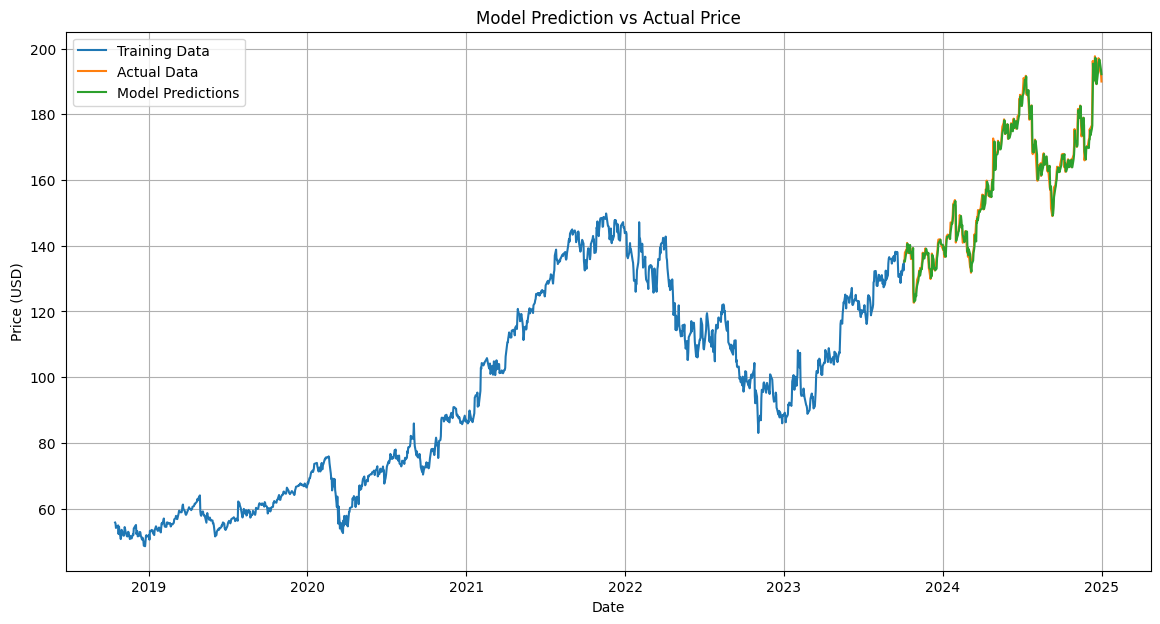

Root Mean Squared Error (RMSE) of the model: 2.8242814784960886


In [48]:
if 'model' in locals() and not stockdata.empty:
    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Plotting the graph
    train = stockdata[:training_data_len + lag_days]
    valid = stockdata[training_data_len + lag_days:]
    valid = valid.assign(Predictions=predictions)

    plt.figure(figsize=(14, 7))
    plt.title('Model Prediction vs Actual Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.plot(train['Close'], label='Training Data')
    plt.plot(valid['Close'], label='Actual Data')
    plt.plot(valid['Predictions'], label='Model Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate the model
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"Root Mean Squared Error (RMSE) of the model: {rmse}")
else:
    print("No data available to evaluate the model. Please run the model training step first.")

PROJECT BY MANAS

GITHUB - MANARSENIC

GITHUB REPO-STOCK_PRICE_PREDICTOR